In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.lines as mlines

import gsw

In [3]:
ds= xr.open_dataset('L0-timeseries/wam_sbus_1230_Nov_Dec_Jan.nc')

In [75]:
# ds.nitrogen_concentration

In [4]:
ds['SA']=gsw.SA_from_SP(ds.salinity, ds.pressure, 18.03, -32.76)
ds['CT']=gsw.CT_from_pt(ds.SA, ds.potential_temperature)

In [5]:
mask = ds["pressure"].notnull()          # DataArray[bool] over time
ds2 = ds.isel(time=mask)                # keep only True positions

In [6]:
def grid2d(x, y, v, xi=1, yi=1, fn='median'):
    if np.size(xi) == 1:
        xi = np.arange(np.nanmin(x), np.nanmax(x)+xi, xi)
    if np.size(yi) == 1:
        yi = np.arange(np.nanmin(y), np.nanmax(y)+yi, yi)

    raw = pd.DataFrame({'x':x,'y':y,'v':v}).dropna()

    grid = np.full([np.size(yi),np.size(xi)], np.nan)
    
    raw['xbins'],xbin_iter = pd.cut(raw.x, xi,retbins=True,labels=False)
    raw['ybins'],ybin_iter = pd.cut(raw.y, yi,retbins=True,labels=False)

    _tmp = raw.groupby(['xbins','ybins'])['v'].agg(fn)
    grid[_tmp.index.get_level_values(1).astype(int),_tmp.index.get_level_values(0).astype(int)] = _tmp.values

    XI,YI = np.meshgrid(xi, yi, indexing='ij')
    return grid,XI.T,YI.T

In [51]:
taxis= np.arange(np.datetime64("2025-11-19"), np.datetime64("2026-01-31"), np.timedelta64(1, "h"))
yaxis=np.arange(0,500,1)
time = ds2.time.values
pres = ds2.pressure.values

In [9]:
do = ds2.oxygen_concentration.values

In [10]:
chl=ds2.chlorophyll.values

In [11]:
bbp470=ds2.backscatter_470.values
bbp700=ds2.backscatter_700.values

In [12]:
sal=ds2.SA.values
temp=ds2.CT.values

In [13]:
nit=ds2.nitrogen_concentration.values

In [78]:
z_max=250

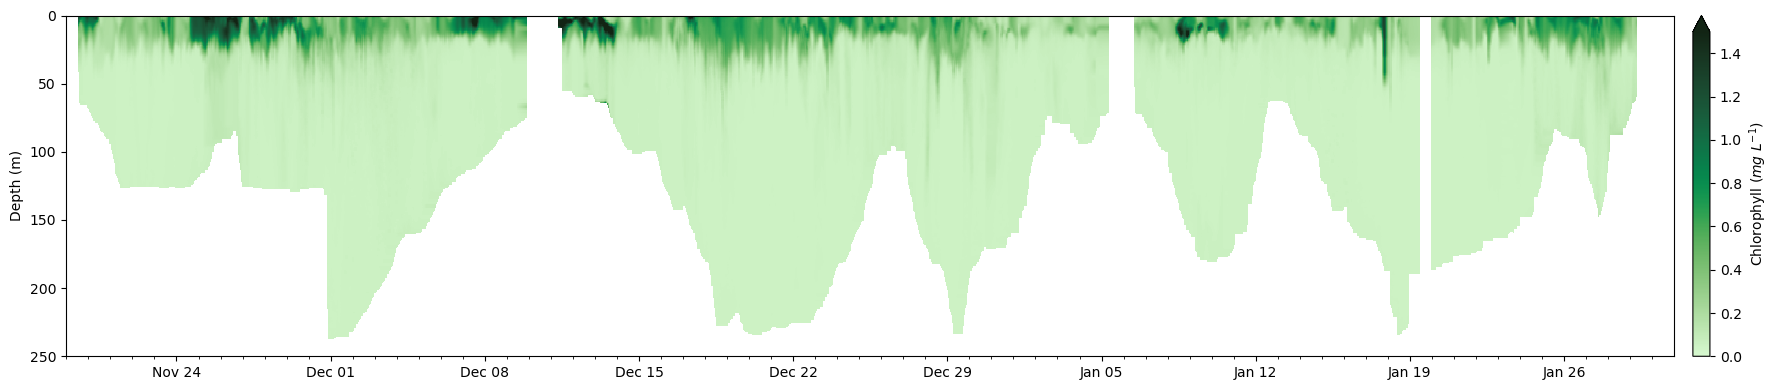

In [79]:
vari, tt, zz=grid2d(time, pres, chl/1000, xi=taxis, yi=yaxis, fn='mean')

plt.figure(figsize=(20,4))

plt.pcolormesh(tt, zz, pd.DataFrame(vari).interpolate(limit=3, max_gap=3, limit_area='inside').bfill().T.interpolate(limit=12, ax_gap=12, limit_area='inside').T.rolling(3, center=True).mean().T.rolling(3, center=True).mean().T, cmap=cmo.algae, vmin=0, vmax=1.5)

plt.colorbar(label='Chlorophyll ($mg$ $L^{-1}$)', extend='max', pad=0.01)
plt.ylim(z_max,0)
plt.ylabel('Depth (m)')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY, interval=1))
plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=1))
# plt.gca().tick_params(which='major', width=3,  length=10)
plt.tight_layout()
plt.savefig('Figures_L0/chl_'+str(z_max)+'.png' ,bbox_inches="tight", pad_inches=0.05)

In [80]:
bbp470_clean=bbp470.copy()
bbp700_clean=bbp700.copy()
bbp470_clean[bbp470>1000]=np.nan
bbp700_clean[bbp700>1000]=np.nan

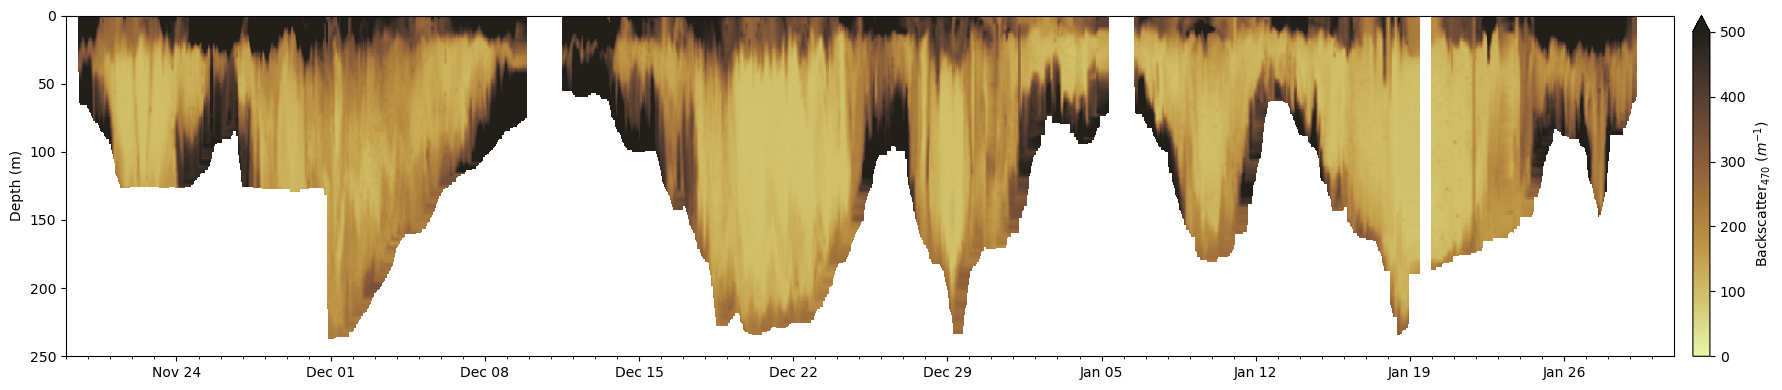

In [81]:
vari, tt, zz=grid2d(time, pres, bbp470_clean, xi=taxis, yi=yaxis, fn='mean')

plt.figure(figsize=(20,4))
plt.pcolormesh(tt, zz, pd.DataFrame(vari).interpolate(limit=3, max_gap=3, limit_area='inside').bfill().T.interpolate(limit=12, ax_gap=12, limit_area='inside').T.rolling(3, center=True).mean().T.rolling(3, center=True).mean().T, cmap=cmo.turbid, vmin=0, vmax=500)
plt.colorbar(label='Backscatter$_{470}$ ($m^{-1}$)', extend='max', pad=0.01)
plt.ylim(z_max,0)
plt.ylabel('Depth (m)')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY, interval=1))
plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=1))
# plt.gca().tick_params(which='major', width=3,  length=10)
plt.tight_layout()
plt.savefig('Figures_L0/bbp470_'+str(z_max)+'.png',bbox_inches="tight", pad_inches=0.05)


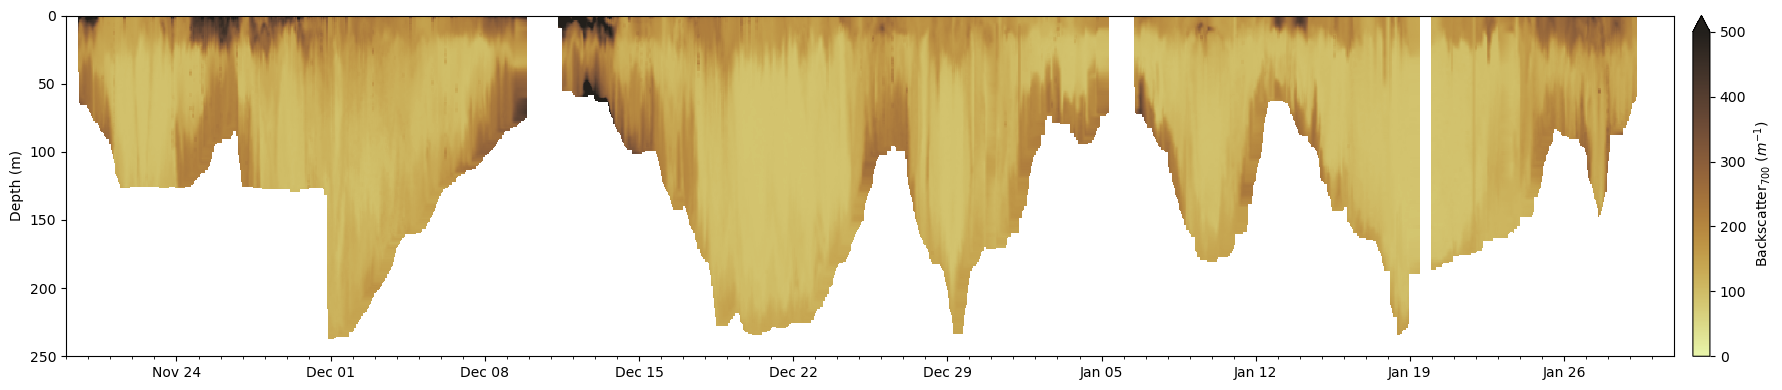

In [82]:
vari, tt, zz=grid2d(time, pres, bbp700_clean, xi=taxis, yi=yaxis, fn='mean')

plt.figure(figsize=(20,4))
plt.pcolormesh(tt, zz, pd.DataFrame(vari).interpolate(limit=3, max_gap=3, limit_area='inside').bfill().T.interpolate(limit=12, ax_gap=12, limit_area='inside').T.rolling(3, center=True).mean().T.rolling(3, center=True).mean().T, cmap=cmo.turbid, vmin=0, vmax=500)
plt.colorbar(label='Backscatter$_{700}$ ($m^{-1}$)', extend='max', pad=0.01)
plt.ylim(z_max,0)
plt.ylabel('Depth (m)')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY, interval=1))
plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=1))
plt.tight_layout()
plt.savefig('Figures_L0/bbp700_'+str(z_max)+'.png',bbox_inches="tight", pad_inches=0.05)


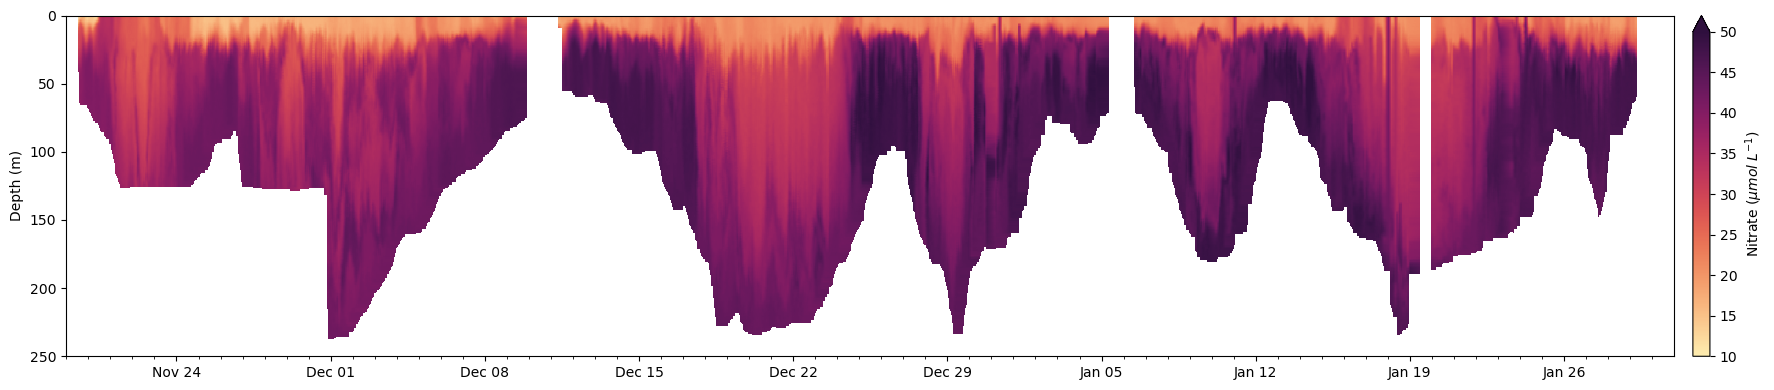

In [83]:
vari, tt, zz=grid2d(time, pres, nit, xi=taxis, yi=yaxis, fn='mean')

plt.figure(figsize=(20,4))
plt.pcolormesh(tt, zz, pd.DataFrame(vari).interpolate(limit=3, max_gap=3, limit_area='inside').bfill().T.interpolate(limit=12, ax_gap=12, limit_area='inside').T.rolling(3, center=True).mean().T.rolling(3, center=True).mean().T, cmap=cmo.matter, vmin=10, vmax=50)
plt.colorbar(label='Nitrate ($\mu$$mol$ $L^{-1}$)', extend='max', pad=0.01)
plt.ylim(z_max,0)
plt.ylabel('Depth (m)')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY, interval=1))
plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=1))
plt.tight_layout()
plt.savefig('Figures_L0/nitrate_'+str(z_max)+'.png',bbox_inches="tight", pad_inches=0.05)


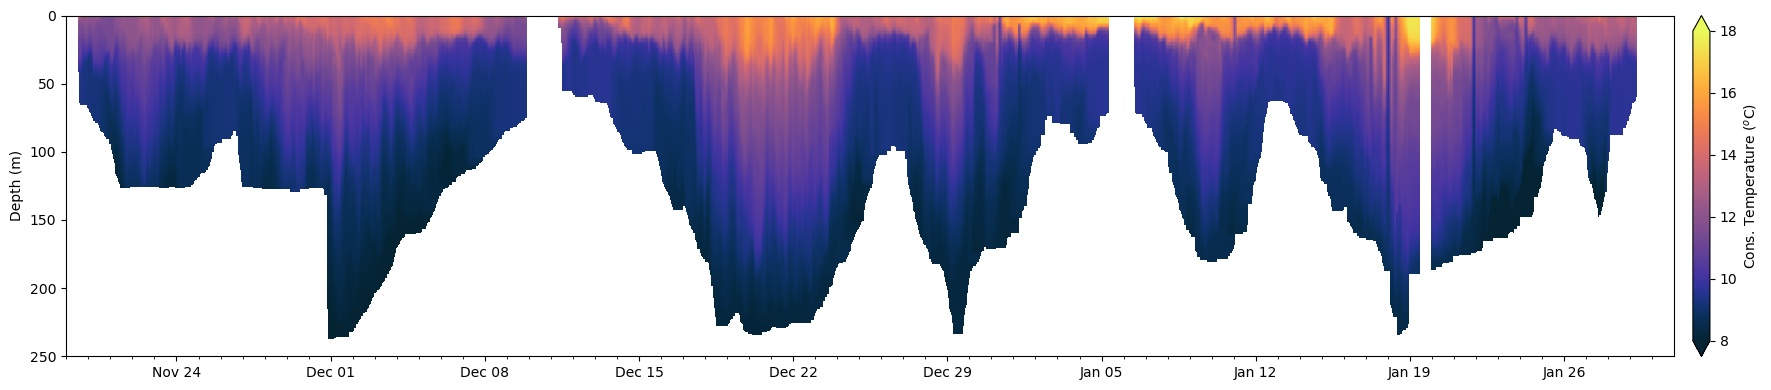

In [84]:
vari_t, tt, zz=grid2d(time, pres, temp, xi=taxis, yi=yaxis, fn='mean')

plt.figure(figsize=(20,4))
plt.pcolormesh(tt, zz, pd.DataFrame(vari_t).interpolate(limit=3, max_gap=3, limit_area='inside').bfill().T.interpolate(limit=12, ax_gap=12, limit_area='inside').T.rolling(3, center=True).mean().T.rolling(3, center=True).mean().T, cmap=cmo.thermal, vmin=8, vmax=18)
plt.colorbar(label='Cons. Temperature ($^{o}$C)', extend='both', pad=0.01)
plt.ylim(z_max,0)
plt.ylabel('Depth (m)')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY, interval=1))
plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=1))
# plt.gca().tick_params(which='major', width=3,  length=10)
plt.tight_layout()
plt.savefig('Figures_L0/CT_'+str(z_max)+'.png',bbox_inches="tight", pad_inches=0.05)


In [85]:
sal_clean=sal.copy()
sal_clean[sal<34.66]=np.nan
# bbp700_clean[bbp700>1000]=np.nan

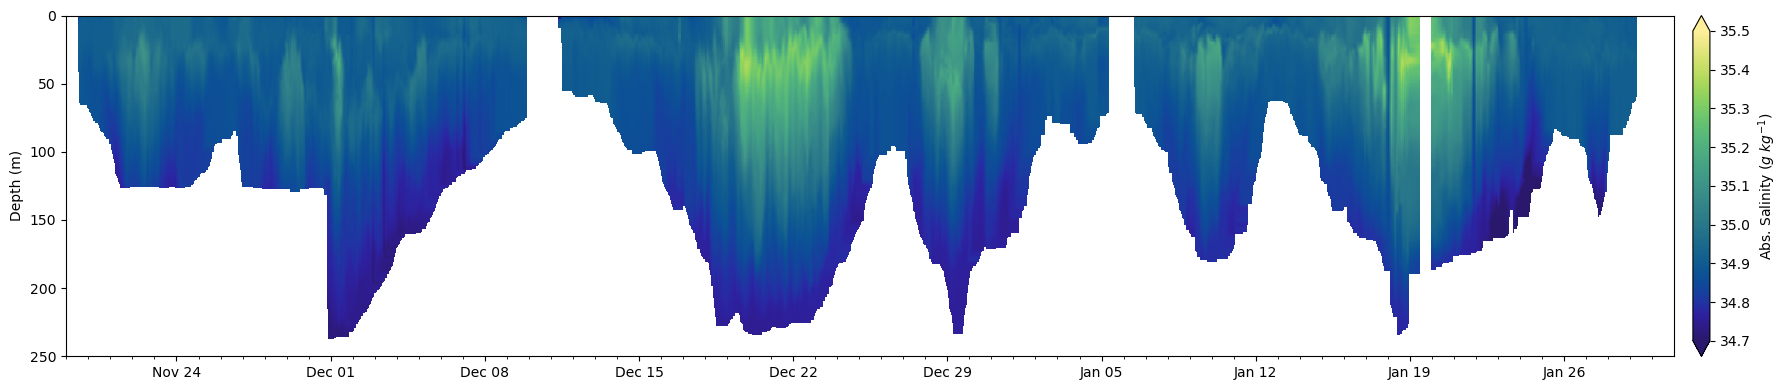

In [86]:
vari_s, tt, zz=grid2d(time, pres, sal_clean, xi=taxis, yi=yaxis, fn='mean')

plt.figure(figsize=(20,4))
plt.pcolormesh(tt, zz, pd.DataFrame(vari_s).interpolate(limit=3, max_gap=3, limit_area='inside').bfill().T.interpolate(limit=12, ax_gap=12, limit_area='inside').T.rolling(3, center=True).mean().T.rolling(3, center=True).mean().T, cmap=cmo.haline, vmin=34.7, vmax=35.5)
plt.colorbar(label='Abs. Salinity ($g$ $kg^{-1}$)', extend='both', pad=0.01)
plt.ylim(z_max,0)
plt.ylabel('Depth (m)')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY, interval=1))
plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=1))
# plt.gca().tick_params(which='major', width=3,  length=10)
plt.tight_layout()
plt.savefig('Figures_L0/SA_'+str(z_max)+'.png',bbox_inches="tight", pad_inches=0.05)


In [87]:
# plt.scatter(vari_s.flatten(), vari_t.flatten())
# plt.axvline(34.66)

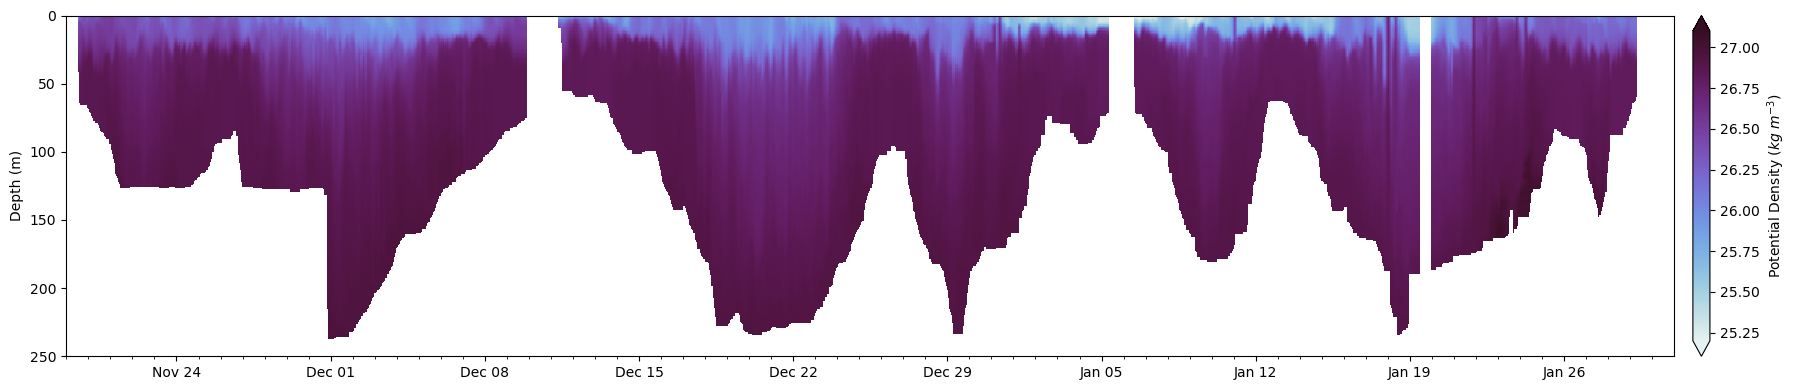

In [88]:
plt.figure(figsize=(20,4))
plt.pcolormesh(tt, zz, pd.DataFrame(gsw.sigma0(vari_s, vari_t)).interpolate(limit=3, max_gap=3, limit_area='inside').bfill().T.interpolate(limit=12, ax_gap=12, limit_area='inside').T.rolling(3, center=True).mean().T.rolling(3, center=True).mean().T, cmap=cmo.dense, vmin=25.2, vmax=27.1)
plt.colorbar(label='Potential Density ($kg$ $m^{-3}$)', extend='both', pad=0.01)
plt.ylim(z_max,0)
plt.ylabel('Depth (m)')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY, interval=1))
plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=1))
# plt.gca().tick_params(which='major', width=3,  length=10)
plt.tight_layout()

plt.savefig('Figures_L0/sigma0_'+str(z_max)+'.png',bbox_inches="tight", pad_inches=0.05)


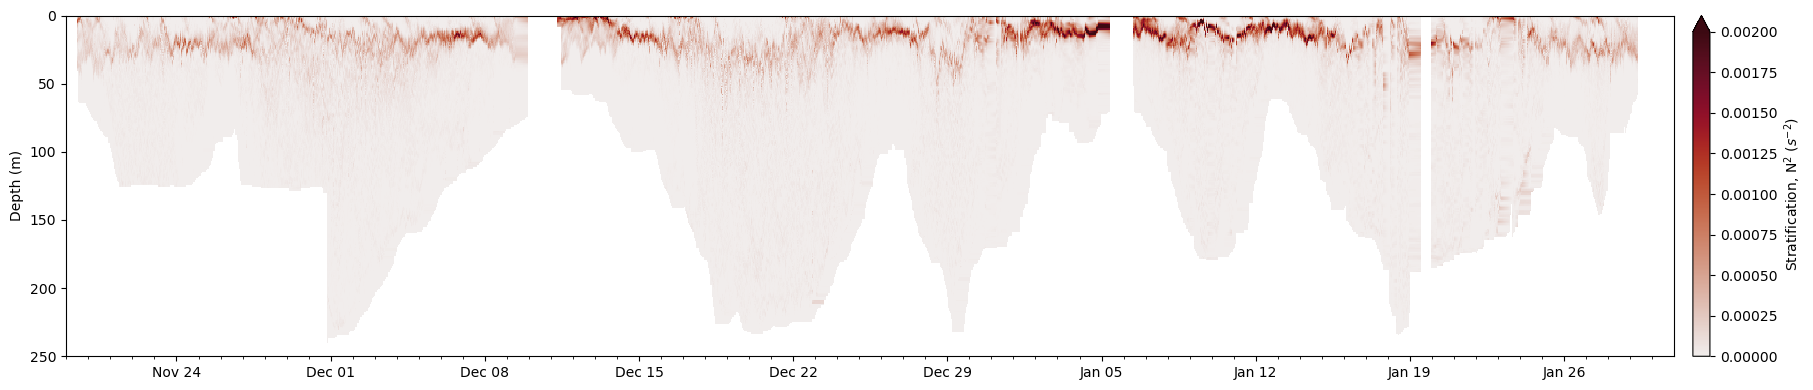

In [89]:
plt.figure(figsize=(20,4))
plt.pcolormesh(tt[:-1], zz[:-1], pd.DataFrame(gsw.Nsquared(vari_s, vari_t, zz)[0]).interpolate(limit=3, max_gap=3, limit_area='inside').bfill().T.interpolate(limit=12, ax_gap=12, limit_area='inside').T.rolling(3, center=True).mean().T.rolling(1, center=True).mean().T, cmap=cmo.amp, vmin=0, vmax=0.002)#, vmin=25.2, vmax=27.1)
plt.colorbar(label='Stratification, N$^{2}$ ($s^{-2}$)', extend='max', pad=0.01)
plt.ylim(z_max,0)
plt.ylabel('Depth (m)')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY, interval=1))
plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=1))
# plt.gca().tick_params(which='major', width=3,  length=10)
plt.tight_layout()
plt.savefig('Figures_L0/N2_'+str(z_max)+'.png',bbox_inches="tight", pad_inches=0.05)


In [93]:
z_max=250

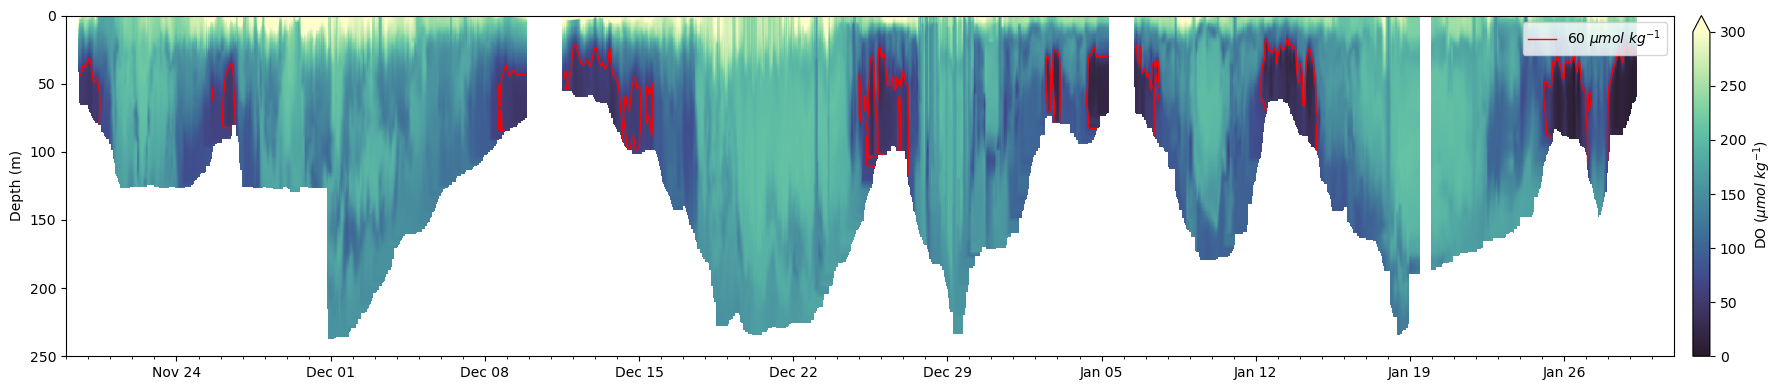

In [94]:
vari, tt, zz=grid2d(time, pres, do, xi=taxis, yi=yaxis, fn='mean')

plt.figure(figsize=(20,4))
oxysm=pd.DataFrame(vari).interpolate(limit=3, max_gap=3, limit_area='inside').bfill().T.interpolate(limit=12, ax_gap=12, limit_area='inside').T.rolling(3, center=True).mean().T.rolling(3, center=True).mean().T
plt.pcolormesh(tt, zz, oxysm, cmap=cmo.deep_r, vmin=0, vmax=300)
plt.colorbar(label='DO ($\mu$$mol$ $kg^{-1}$)', extend='max', pad=0.01)
plt.ylim(z_max,0)
plt.ylabel('Depth (m)')
plt.contour(tt, zz, oxysm,colors='red',levels=[60], linewidths=1)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY, interval=1))
plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=1))

red_line = mlines.Line2D([], [], color='red', linewidth=1, label='60 $\mu$$mol$ $kg^{-1}$')
plt.legend(handles=[red_line], loc='best')
plt.tight_layout()
plt.savefig('Figures_L0/do_'+str(z_max)+'.png' ,bbox_inches="tight", pad_inches=0.05)